In [2]:
from google.colab import files
uploaded = files.upload()

Saving rpg_steam_clean.csv to rpg_steam_clean.csv


Quartiles:
Columna: steam_id_number Primer quartil: 2621 Segundo quartil 5240 Tercer quartil: 7859
Columna: game_title Primer quartil: WolfQuest: Anniversary Edition Segundo quartil Terragon: Symbol Of Magic Tercer quartil: 狂潮-Staggering Through The Dark
Columna: release_month Primer quartil: January Segundo quartil September Tercer quartil: November
Columna: release_year Primer quartil: 2019 Segundo quartil 2021 Tercer quartil: 2020
Columna: release_price Primer quartil: 0.99 Segundo quartil 8.99 Tercer quartil: 1.99
Columna: lowest_estimated_owners_number Primer quartil: 200,000 Segundo quartil 20,000 Tercer quartil: 20,000
Columna: highest_estimated_owners_number Primer quartil: 500,000 Segundo quartil 20,000 Tercer quartil: 20,000
Columna: average_estimated_owners_number Primer quartil: 350,000 Segundo quartil 20,000 Tercer quartil: 20,000
Columna: developer Primer quartil: ONEONE1 Segundo quartil SVGames Tercer quartil: GammaLateral
Columna: publisher Primer quartil: Phoenix Games

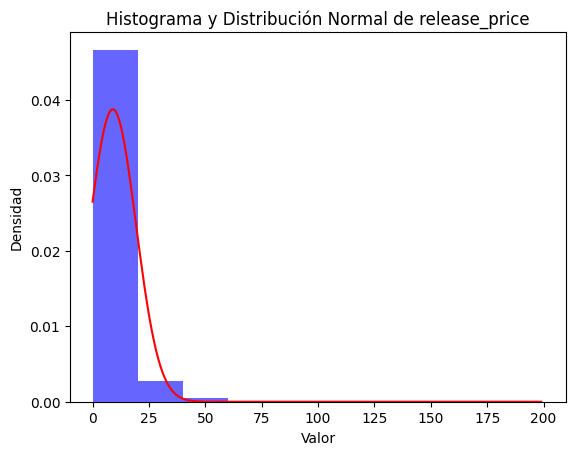

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import math

dataset=pd.read_csv('rpg_steam_clean.csv')
print("Quartiles:")
for column in dataset.columns:
  nfilas=dataset[column].count()
  q1=round((nfilas+1)/4)
  q2=round(2*(nfilas+1)/4)
  q3=round(3*(nfilas+1)/4)
  print("Columna:",column,"Primer quartil:",dataset[column].iloc[q1],"Segundo quartil",dataset[column].iloc[q2],"Tercer quartil:",dataset[column].iloc[q3])
print("Percentiles:")
for column in dataset.columns:
  nfilas=dataset[column].count()
  p1=round((nfilas+1)/100)
  p2=round(50*(nfilas+1)/100)
  p3=round(99*(nfilas+1)/100)
  print("Columna:",column,"Primer percentil:",dataset[column].iloc[p1],"Segundo percentil",dataset[column].iloc[p2],"Tercer percentil:",dataset[column].iloc[p3])

def distribucion_normal(x, media, desviacion_estandar):
    return (1 / (desviacion_estandar * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - media) / desviacion_estandar) ** 2)
columna_deseada = 'release_price'
datos = dataset[columna_deseada].dropna()
if datos.empty:
    print(f"No hay datos disponibles en la columna '{columna_deseada}'")
else:
    media=datos.mean()
    desviacion_estandar = datos.std()
    x_vals = [x for x in range(int(datos.min()), int(datos.max()) + 1)]
    y_vals = [distribucion_normal(x, media, desviacion_estandar) for x in x_vals]
    plt.hist(datos, bins=10, density=True, alpha=0.6, color='b')
    plt.plot(x_vals, y_vals, color='r')
    plt.title(f'Histograma y Distribución Normal de {columna_deseada}')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')
    plt.show()

<ipython-input-5-fbcffa1b6b22>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seleccionado[columna] = seleccionado[columna].str.replace(',', '')
<ipython-input-5-fbcffa1b6b22>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seleccionado[columna] = pd.to_numeric(seleccionado[columna], errors='coerce').astype('Int64')


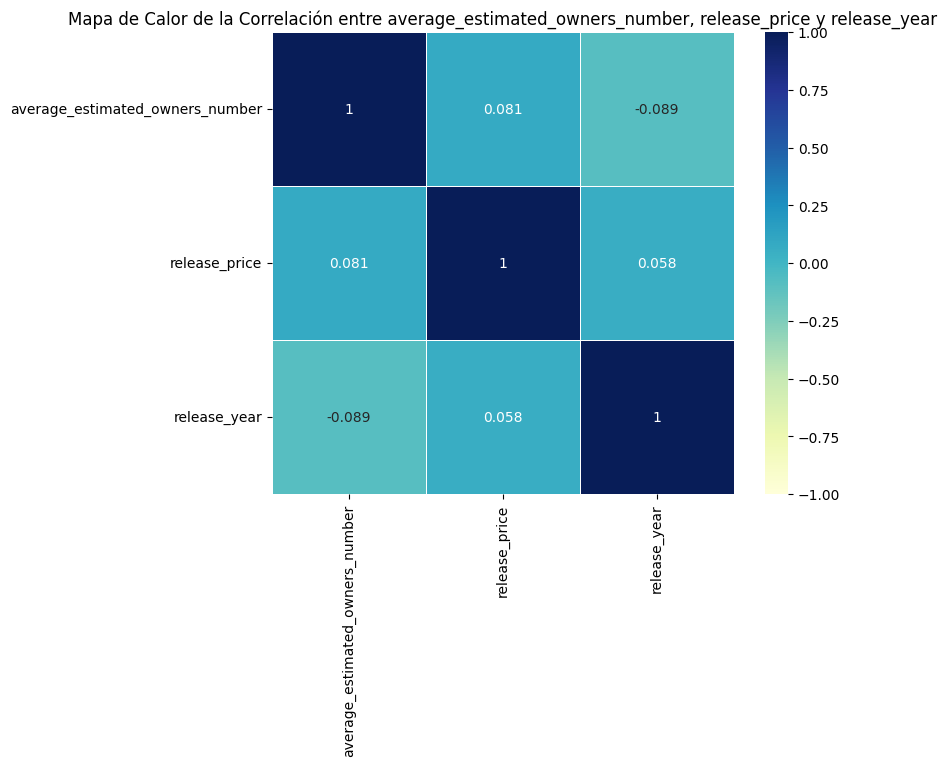

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset=pd.read_csv('rpg_steam_clean.csv')
columnas_seleccionadas = ['average_estimated_owners_number', 'release_price', 'release_year']
seleccionado = dataset[columnas_seleccionadas]
for columna in columnas_seleccionadas:
    if seleccionado[columna].dtype == 'object':
      seleccionado[columna] = seleccionado[columna].str.replace(',', '')
      seleccionado[columna] = pd.to_numeric(seleccionado[columna], errors='coerce').astype('Int64')

corr_matrix=seleccionado.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Mapa de Calor de la Correlación entre average_estimated_owners_number, release_price y release_year")
plt.show()


<ipython-input-6-1774cb6b2602>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista[columna] = lista[columna].str.replace(',', '')
<ipython-input-6-1774cb6b2602>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista[columna] = pd.to_numeric(lista[columna], errors='coerce').astype('Int64')


average_estimated_owners_number:
  Media: 169578.60074448792
  Mediana: 20000.0
  Moda: 20000

release_price:
  Media: 8.97456523814069
  Mediana: 5.99
  Moda: 0.0

release_year:
  Media: 2018.702109382457
  Mediana: 2019.0
  Moda: 2021



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

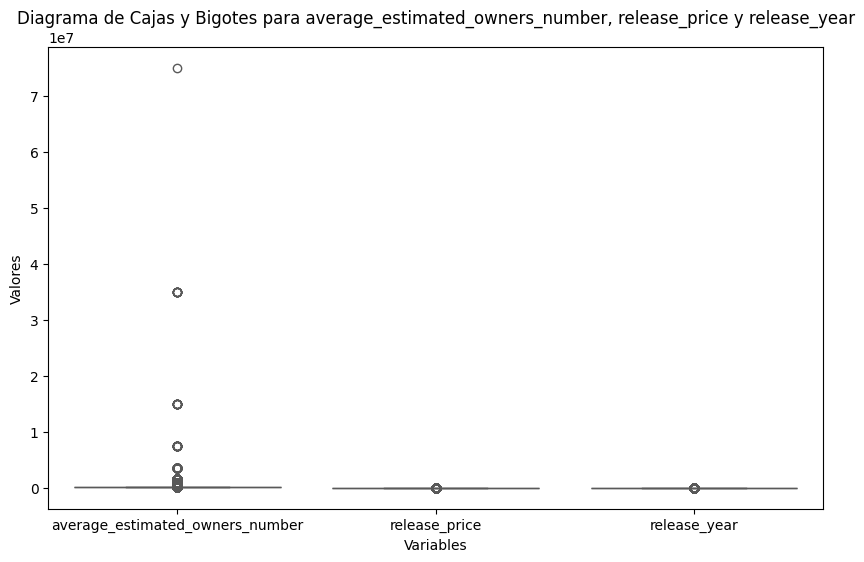

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
dataset=pd.read_csv('rpg_steam_clean.csv')
columnas = ['average_estimated_owners_number', 'release_price', 'release_year']
lista = dataset[columnas]
for columna in columnas:
    if lista[columna].dtype == 'object':
        lista[columna] = lista[columna].str.replace(',', '')
        lista[columna] = pd.to_numeric(lista[columna], errors='coerce').astype('Int64')
for columna in columnas_seleccionadas:
    media=lista[columna].mean()
    mediana=lista[columna].median()
    moda=lista[columna].mode()[0]

    print(f"{columna}:")
    print(f"  Media: {media}")
    print(f"  Mediana: {mediana}")
    print(f"  Moda: {moda}")
    print("")
plt.figure(figsize=(10, 6))
sns.boxplot(data=lista, orient="v", palette="Set2")
plt.title("Diagrama de Cajas y Bigotes para average_estimated_owners_number, release_price y release_year")
plt.ylabel("Valores")
plt.xlabel("Variables")
plt.show()
